#  Titanic dataset- Assignment on preprocessing


In [225]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment


In [226]:
# Read the Titanic dataset
df=pd.read_csv('/content/titanic_dataset.csv')

In [227]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make ‘PassengerId’ as the index column

In [229]:
df=df.set_index('PassengerId')

In [230]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [232]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [233]:
df.skew()

<ipython-input-233-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

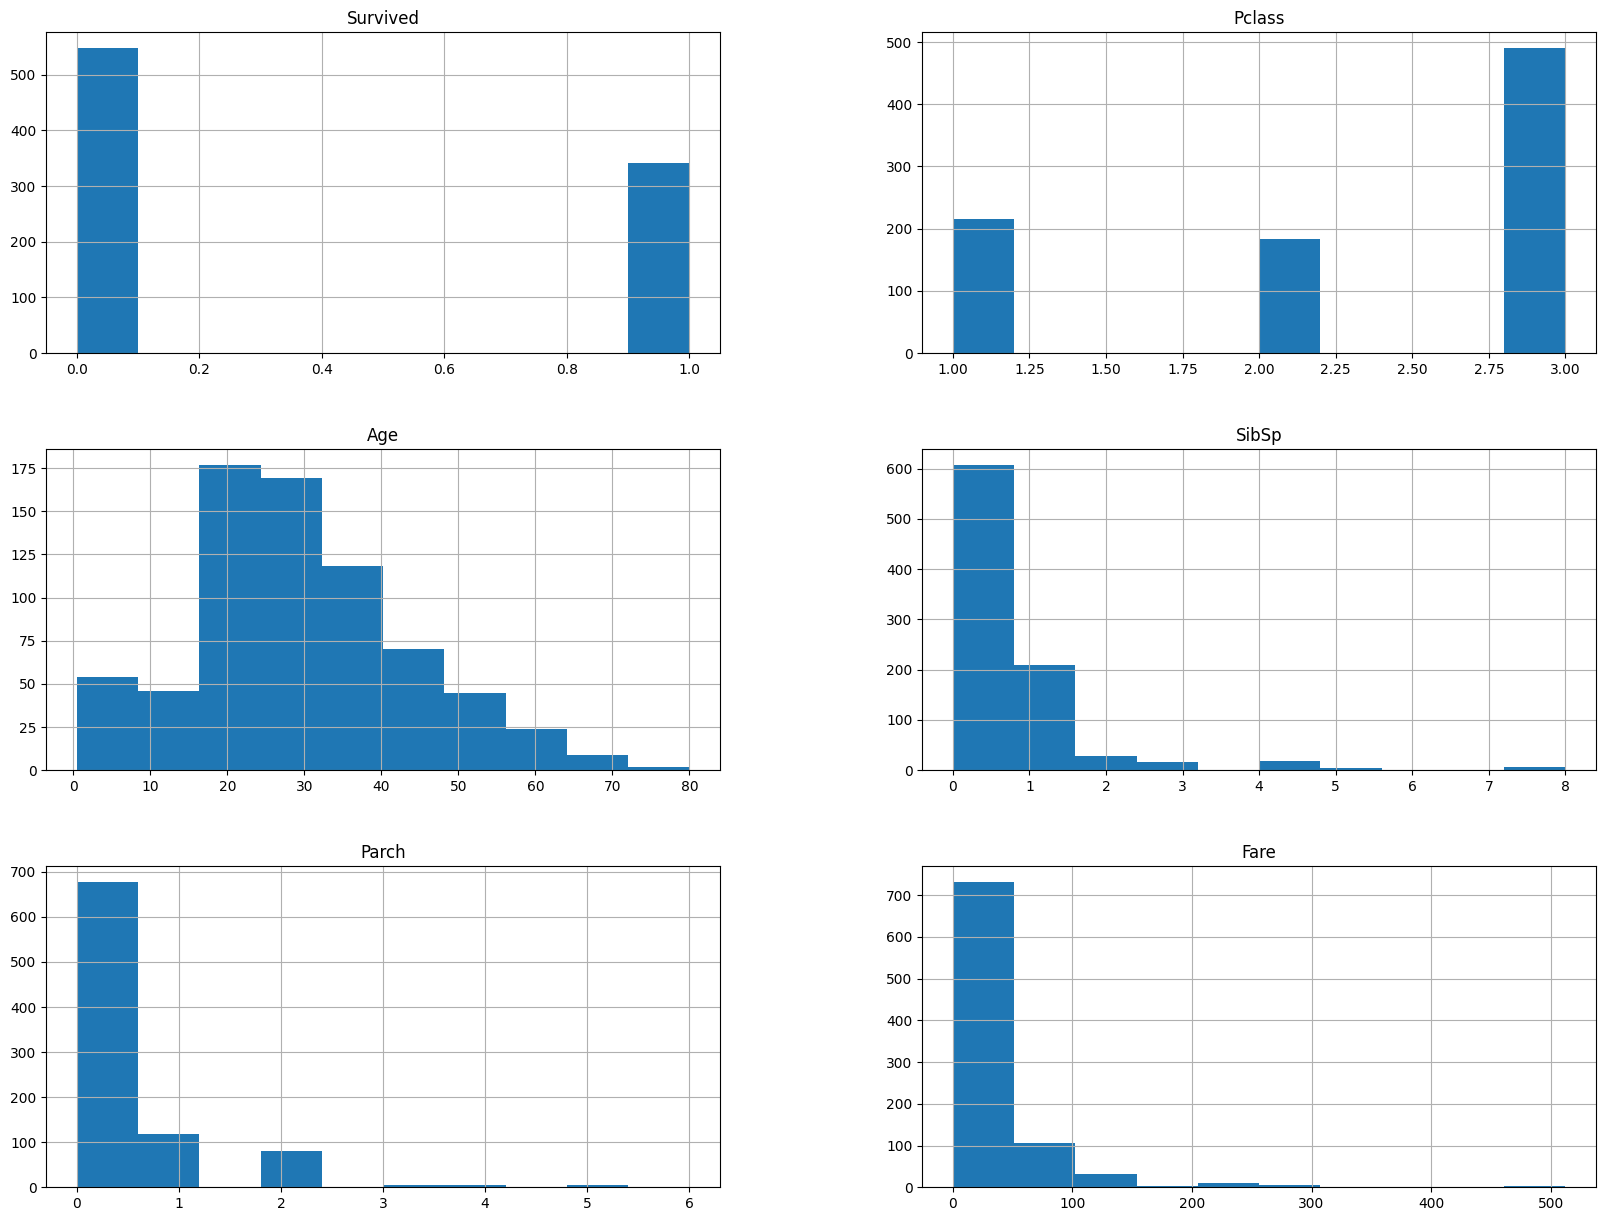

In [234]:
df.hist(figsize=(20,15))
plt.show()

## 4. Fill in all the missing values present in all the columns in the dataset

In [235]:
# handling missing values in 'Age' column using median since Age is moderately skewed
df['Age']=df['Age'].fillna(df['Age'].median())

In [236]:
df.skew()

<ipython-input-236-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Survived    0.478523
Pclass     -0.630548
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

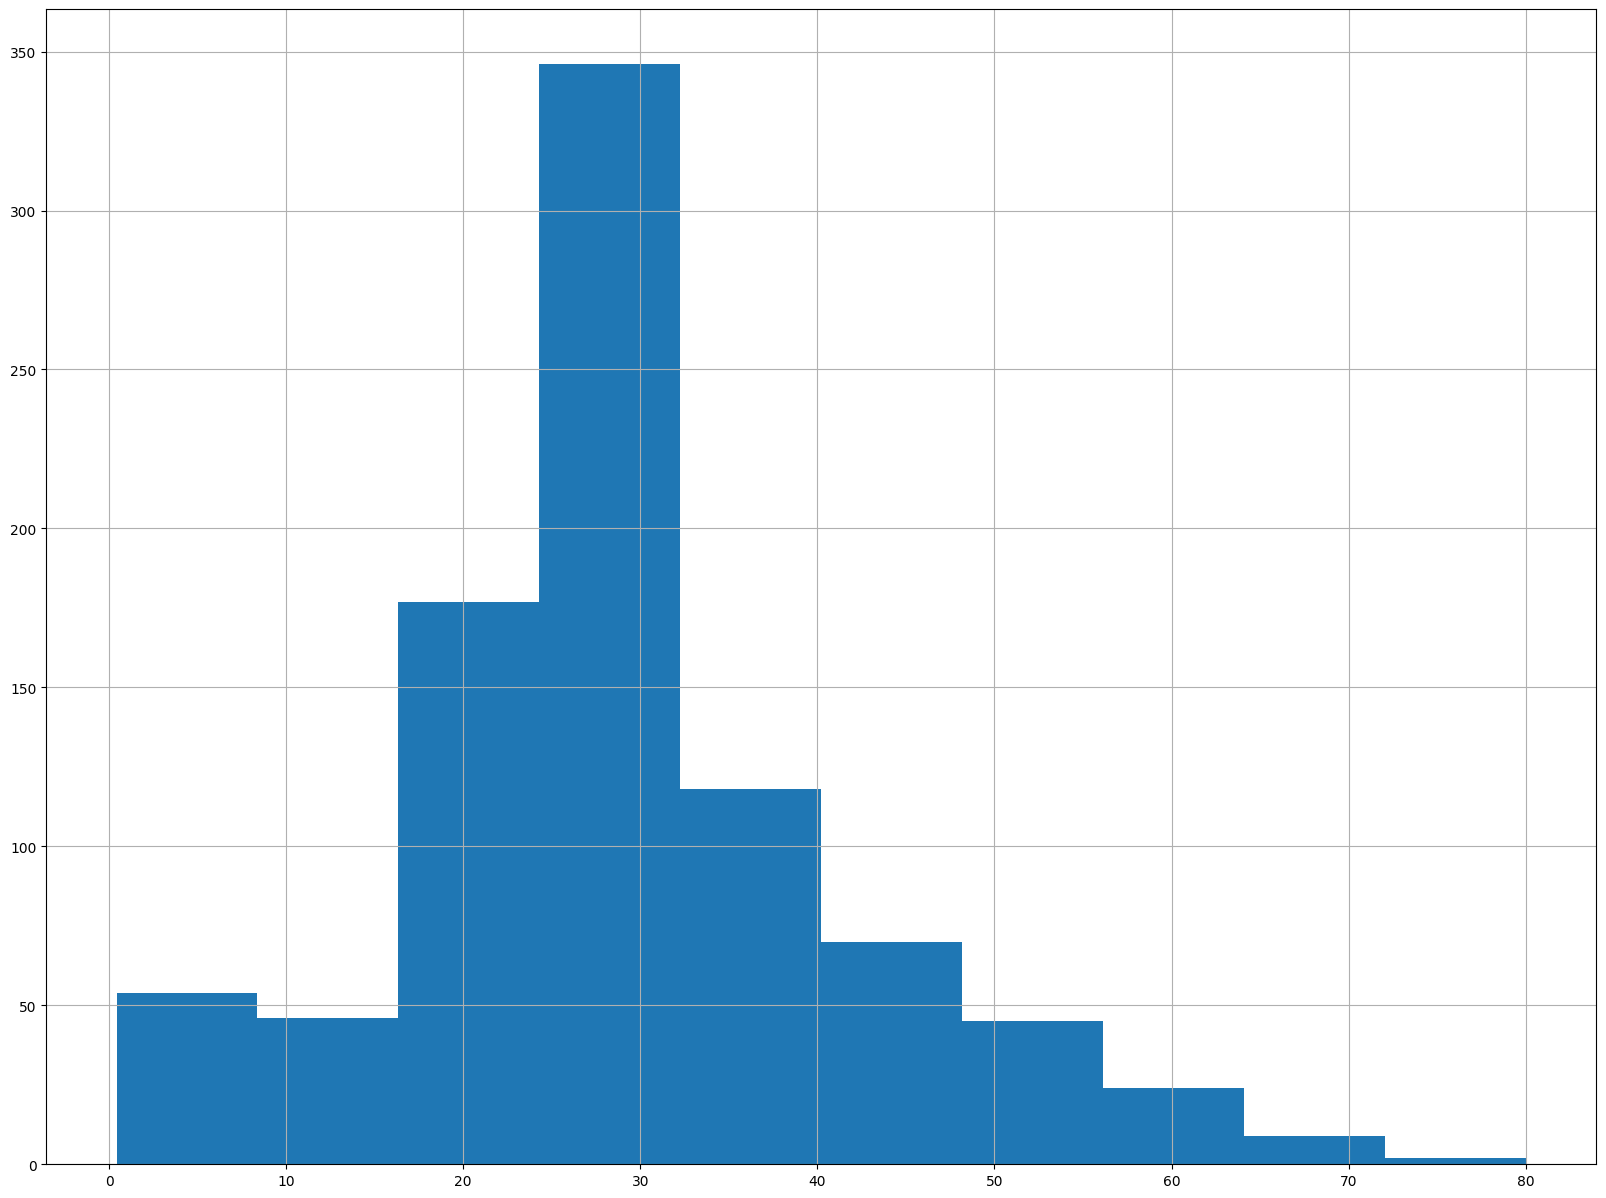

In [237]:
df['Age'].hist(figsize=(20,15))
plt.show()

In [238]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [239]:
# handling missing values in 'Cabin' by dropping that column. Since there are 687 missing values in it we can drop that column
df.drop('Cabin',axis=1,inplace=True)

In [240]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [241]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [242]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [243]:
# using mode to handle the missing values in 'Embarked' column
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [244]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## 5. Check and handle outliers in at least 3 columns in the dataset

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


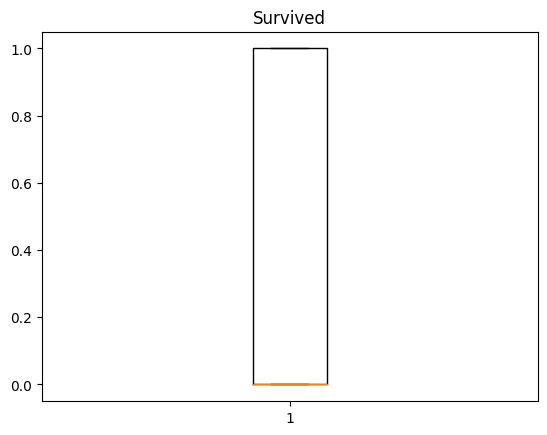

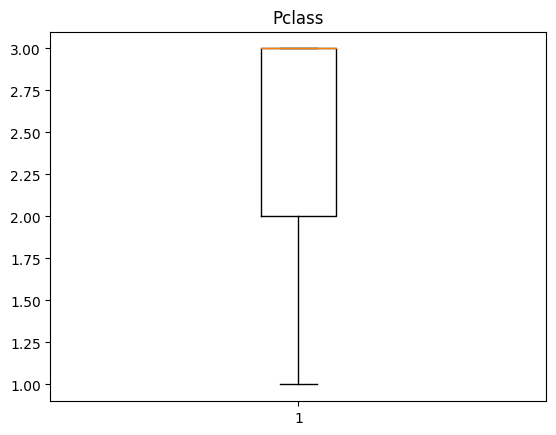

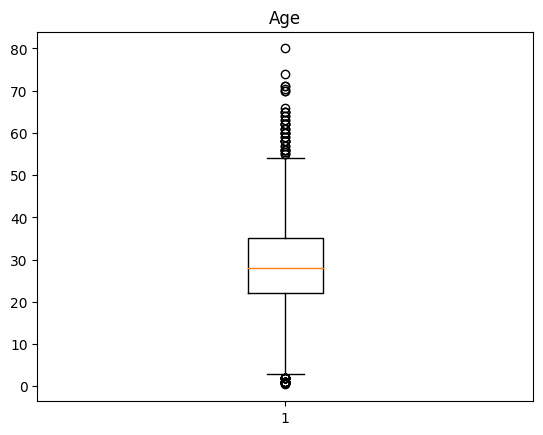

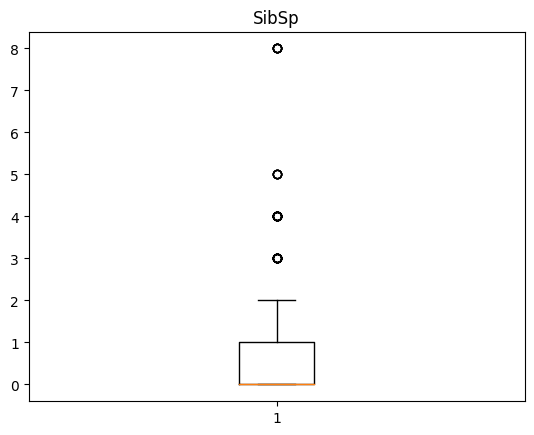

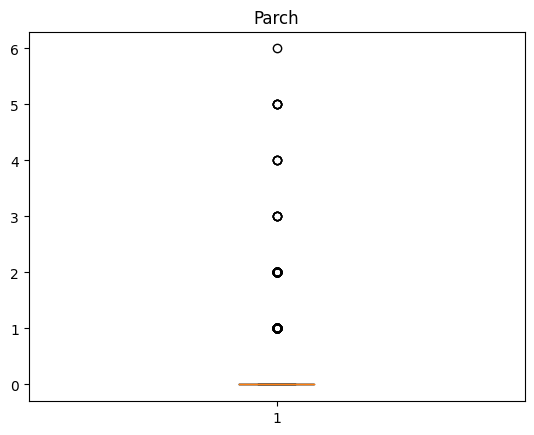

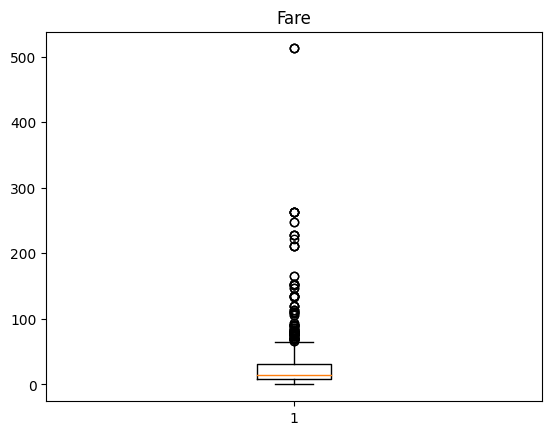

In [246]:
# to check for outliers in the dataset, first we create the boxplot
num_columns=['Survived','Pclass','Age','SibSp','Parch','Fare']
for i in num_columns:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i);

Handling outliers of 'Age','Fare' and 'SibSp' using Inter Quartile Range method

Handling Outliers in 'Age' column

In [248]:
q1=np.percentile(df['Age'],25,method='midpoint')
q2=np.percentile(df['Age'],50,method='midpoint')
q3=np.percentile(df['Age'],75,method='midpoint')

In [249]:
print('Q1 is',q1)
print('Q2 is',q2)
print('Q3 is',q3)

Q1 is 22.0
Q2 is 28.0
Q3 is 35.0


In [250]:
IQR=q3-q1

In [251]:
print('IQR is ',IQR)

IQR is  13.0


In [252]:
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

In [253]:
print('Lower value:',low_lim)
print('Upper value:',up_lim)

Lower value: 2.5
Upper value: 54.5


In [254]:
outliers=[]
for x in df['Age']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [255]:
df['Age']=df['Age'].clip(lower=low_lim,upper=up_lim)

In [256]:
outliers=[]
for x in df['Age']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[]


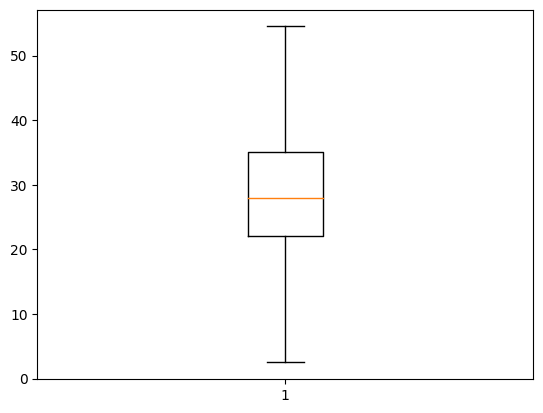

In [257]:
plt.boxplot(df['Age'])
plt.show()

Handling outliers in 'Fare' Column

In [258]:
q1=np.percentile(df['Fare'],25,method='midpoint')
q2=np.percentile(df['Fare'],50,method='midpoint')
q3=np.percentile(df['Fare'],75,method='midpoint')

In [259]:
IQR=q3-q1
print ('IQR is', IQR)

IQR is 23.0896


In [260]:
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
print ('Lower Limit:',low_lim,'Upper Limit:',up_lim)

Lower Limit: -26.724 Upper Limit: 65.6344


In [261]:
outliers=[]
for i in df['Fare']:
  if ((i<low_lim) or i>up_lim):
     outliers.append(i)

print (outliers)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [262]:
df['Fare']=df['Fare'].clip(lower=low_lim,upper=up_lim)

In [263]:
outliers=[]
for i in df['Fare']:
  if ((i<low_lim) or i>up_lim):
     outliers.append(i)

print (outliers)

[]


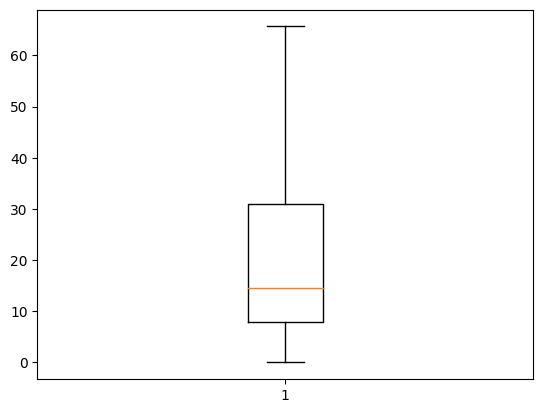

In [264]:
plt.boxplot(df['Fare'])
plt.show()

Handling outliers in 'SibSp' Column

In [265]:
q1=np.percentile(df['SibSp'],25,method='midpoint')
q2=np.percentile(df['SibSp'],50,method='midpoint')
q3=np.percentile(df['SibSp'],75,method='midpoint')

In [266]:
print(q1,q2,q3)

0.0 0.0 1.0


In [267]:
IQR=q3-q1
print ('IQR is', IQR)

IQR is 1.0


In [268]:
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
print ('Lower Limit:',low_lim,'Upper Limit:',up_lim)

Lower Limit: -1.5 Upper Limit: 2.5


In [269]:
outliers=[]
for i in df['SibSp']:
  if ((i<low_lim) or i>up_lim):
     outliers.append(i)

print (outliers)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [270]:
df['SibSp']=df['SibSp'].clip(lower=low_lim,upper=up_lim)

In [271]:
outliers=[]
for i in df['SibSp']:
  if ((i<low_lim) or i>up_lim):
     outliers.append(i)

print (outliers)

[]


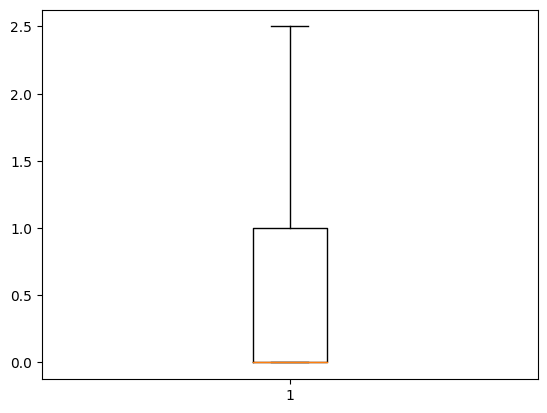

In [272]:
plt.boxplot(df['SibSp'])
plt.show()

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [273]:
# Titanic Dataset
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1.0,2,W./C. 6607,23.4500,S


In [287]:
# Setting a new dataframe X for Scaling
# 'Survived' is the target variable
X=df[['Pclass','Age','SibSp','Parch','Fare']]

In [288]:
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1.0,0,7.2500
2,1,38.0,1.0,0,65.6344
3,3,26.0,0.0,0,7.9250
4,1,35.0,1.0,0,53.1000
5,3,35.0,0.0,0,8.0500
...,...,...,...,...,...
887,2,27.0,0.0,0,13.0000
888,1,19.0,0.0,0,30.0000
889,3,28.0,1.0,2,23.4500


Performing Min Max Scaling for dataframe X

In [289]:
from sklearn.preprocessing import MinMaxScaler

In [290]:
minmax=MinMaxScaler()

In [291]:
X_mm=minmax.fit_transform(X)

In [292]:
X_mm=pd.DataFrame(X_mm)

In [293]:
X_mm

,0,1,2,3,4
0,1.0,0.375000,0.4,0.000000,0.110460
1,0.0,0.682692,0.4,0.000000,1.000000
2,1.0,0.451923,0.0,0.000000,0.120745
3,0.0,0.625000,0.4,0.000000,0.809027
4,1.0,0.625000,0.0,0.000000,0.122649
...,...,...,...,...,...
886,0.5,0.471154,0.0,0.000000,0.198067
887,0.0,0.317308,0.0,0.000000,0.457077
888,1.0,0.490385,0.4,0.333333,0.357282
889,0.0,0.451923,0.0,0.000000,0.457077


In [294]:
X_mm.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.510371,0.170595,0.063599,0.366375
std,0.418036,0.232155,0.283298,0.134343,0.312056
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.000000,0.000000,0.120522
50%,1.000000,0.490385,0.000000,0.000000,0.220223
75%,1.000000,0.625000,0.400000,0.000000,0.472313
max,1.000000,1.000000,1.000000,1.000000,1.000000


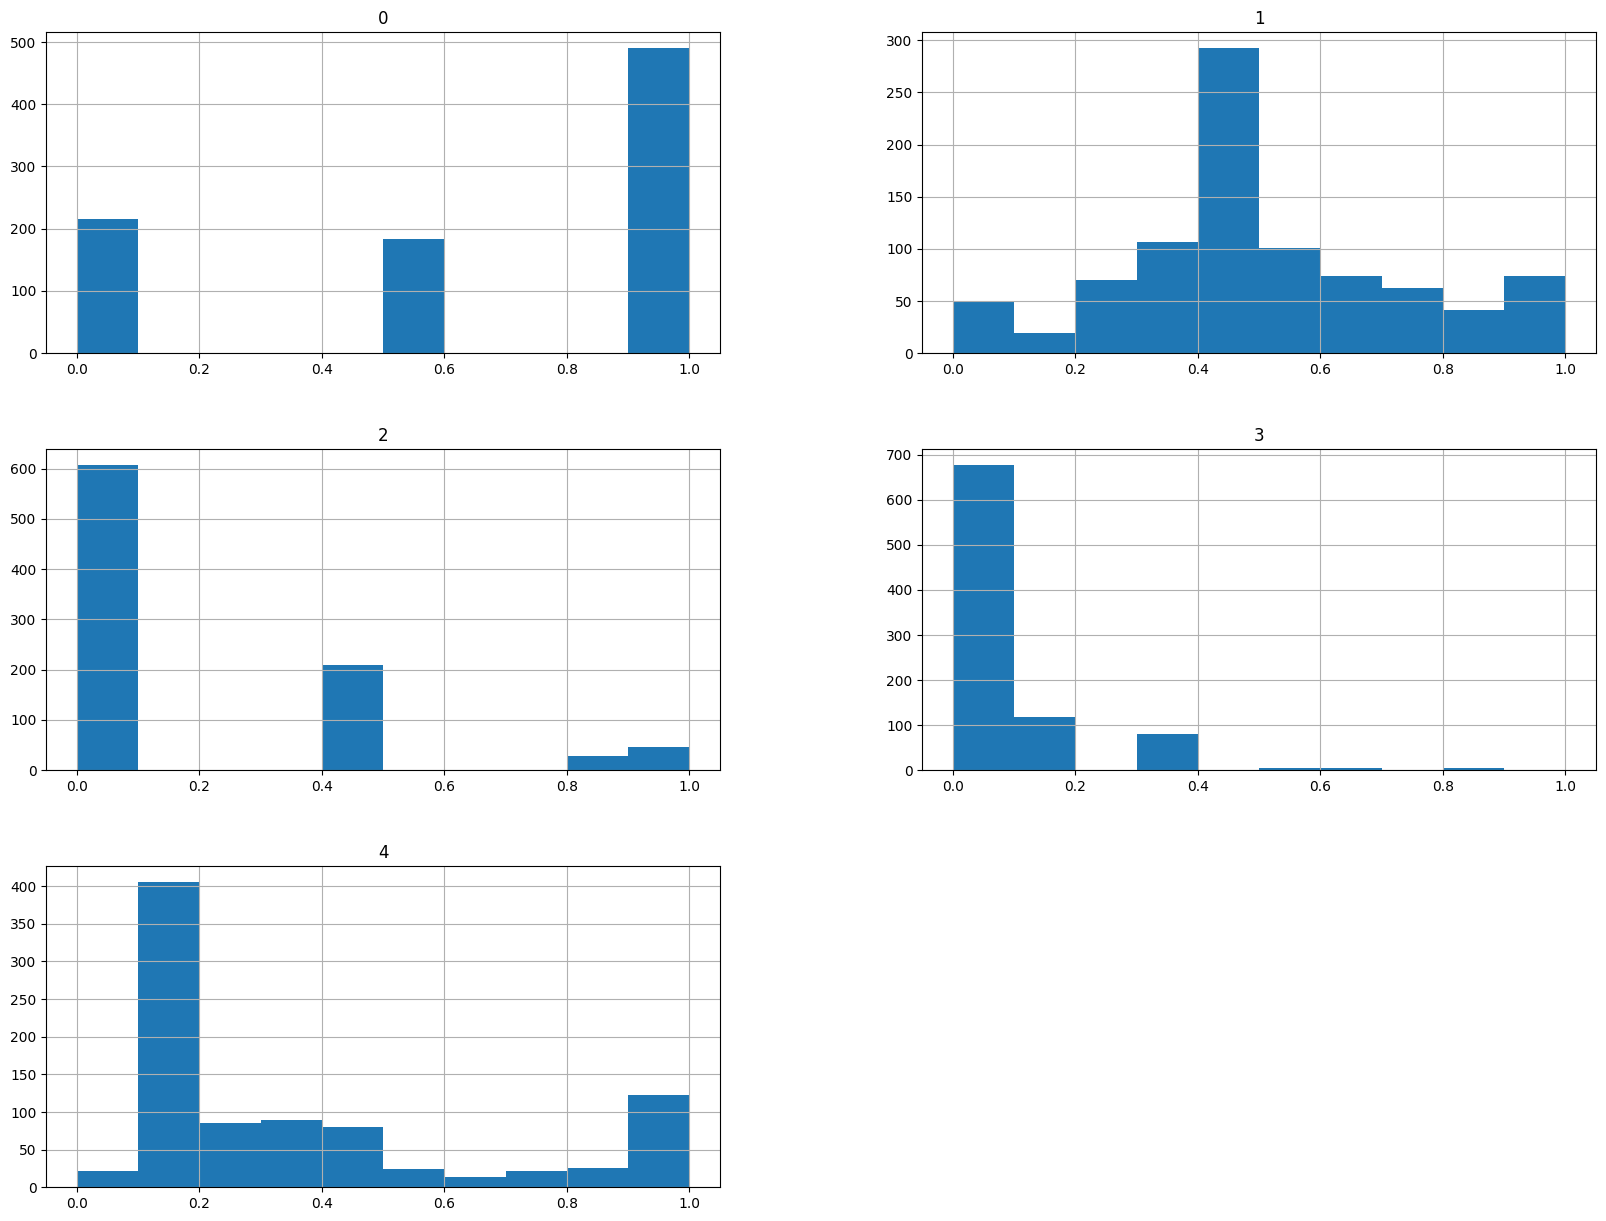

In [295]:
X_mm.hist(figsize=(20,15))
plt.show()